## This Script is used for re-creating three graphs from other studies for my literature Review:

### Stock Oil Correlation graph in the Literature Review

The goal is to indicate that the relationship is time-varying and changing

using yFinance to obtain daily S&P 500 prices

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# obtain S&P 500 data including adjusted close prices
# sp500 = yf.download("^GSPC", start="1986-01-01", end="2025-12-31", auto_adjust=False)
# sp500.to_csv("sp500_data.csv")

In [2]:
# loading daily oil prices
oil_prices = pd.read_csv('WTI_oil_daily.csv', sep=';', decimal = ',', header = 0) 

In [3]:
# Change Date column to datetime
oil_prices['Date'] = pd.to_datetime(oil_prices['Date'])

In [4]:
oil_prices

,Date,WTI Spot Price
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
9895,2025-04-22,64.60
9896,2025-04-23,62.64
9897,2025-04-24,63.55
9898,2025-04-25,63.85


In [5]:
# SP500 data
sp500 = pd.read_csv('sp500_data.csv', sep=',', decimal = '.', header = 0)
# Change Date column to datetime
sp500['Date'] = pd.to_datetime(sp500['Date'])

In [6]:
sp500

,Date,Adj Close,Close,High,Low,Open,Volume
0,1986-01-02,209.589996,209.589996,211.279999,208.929993,211.279999,98960000
1,1986-01-03,210.880005,210.880005,210.880005,209.509995,209.589996,105000000
2,1986-01-06,210.649994,210.649994,210.979996,209.929993,210.880005,99610000
3,1986-01-07,213.800003,213.800003,213.800003,210.649994,210.649994,153000000
4,1986-01-08,207.970001,207.970001,214.570007,207.490005,213.800003,180300000
...,...,...,...,...,...,...,...
9921,2025-05-19,5963.600098,5963.600098,5968.609863,5895.689941,5902.879883,4144010000
9922,2025-05-20,5940.459961,5940.459961,5953.060059,5909.259766,5944.660156,4416850000
9923,2025-05-21,5844.609863,5844.609863,5938.370117,5830.910156,5910.180176,5254250000
9924,2025-05-22,5842.009766,5842.009766,5878.080078,5825.819824,5841.259766,5157050000


In [7]:
# for each of the three rename Open, High, Low, Close, Adj Close, and Volume columns to include the sector name
sp500 = sp500.rename(columns={'Open': 'SP500_Open', 'High': 'SP500_High', 'Low': 'SP500_Low', 'Close': 'SP500_Close', 'Adj Close': 'SP500_Adj_Close', 'Volume': 'SP500_Volume'})

In [8]:
# merge the two sector dfs into one dataframe
merged_df = pd.merge(oil_prices, sp500, on='Date', how='inner')


In [9]:
# only keep WTI Spot Price and SP500_Adj_Close columns
merged_df = merged_df[['Date', 'WTI Spot Price', 'SP500_Adj_Close']]

In [10]:
merged_df

,Date,WTI Spot Price,SP500_Adj_Close
0,1986-01-02,25.56,209.589996
1,1986-01-03,26.00,210.880005
2,1986-01-06,26.53,210.649994
3,1986-01-07,25.85,213.800003
4,1986-01-08,25.87,207.970001
...,...,...,...
9865,2025-04-22,64.60,5287.759766
9866,2025-04-23,62.64,5375.859863
9867,2025-04-24,63.55,5484.770020
9868,2025-04-25,63.85,5525.209961


In [11]:
# Convert Date column to datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

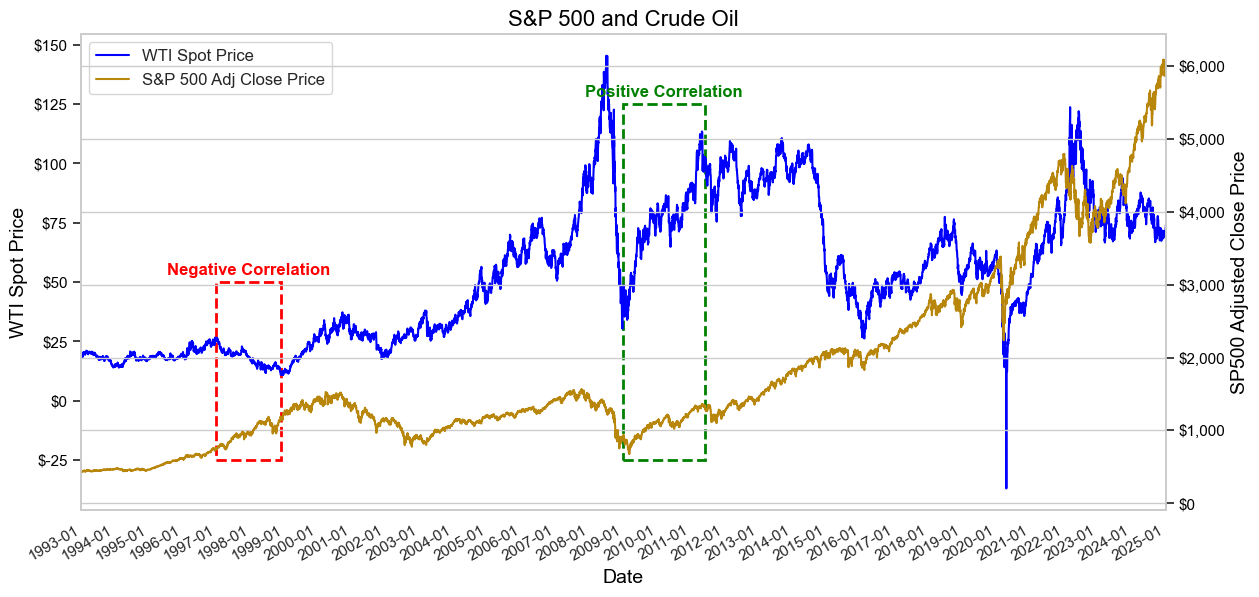

In [12]:
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pandas as pd
from matplotlib.ticker import FuncFormatter

# Set the style of seaborn
sns.set(style="whitegrid")

# Set the figure size
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the WTI Spot Price on the left y-axis
ax1.set_xlabel('Date', fontsize=14, color='black')
ax1.set_ylabel('WTI Spot Price', fontsize=14, color='black')
line1, = ax1.plot(merged_df['Date'], merged_df['WTI Spot Price'], color='blue', label='WTI Spot Price')
ax1.tick_params(axis='y', labelcolor='black')
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Limit x-axis range
start_date = pd.to_datetime('1993-01-01')
end_date = pd.to_datetime('2025-01-01')
ax1.set_xlim([start_date, end_date])

# Adjust x-axis ticks for better readability
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.YearLocator())
fig.autofmt_xdate()

# Create a second y-axis for SP500 Adjusted Close Price
ax2 = ax1.twinx()
ax2.set_ylabel('SP500 Adjusted Close Price', fontsize=14, color='black')
line2, = ax2.plot(merged_df['Date'], merged_df['SP500_Adj_Close'], color='darkgoldenrod', label='S&P 500 Adj Close Price')
ax2.tick_params(axis='y', labelcolor='black')
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Define rectangle highlights with custom y-axis spans
highlight_rects = [
    {'start': '1997-01', 'end': '1998-12', 'color': 'red', 'label': 'Negative Correlation', 'ymin': -25, 'ymax': 50},
    #{'start': '2003-06', 'end': '2006-12', 'color': 'black', 'label': 'No Correlation', 'ymin': -25, 'ymax': 77},
    {'start': '2009-01', 'end': '2011-06', 'color': 'green', 'label': 'Positive Correlation', 'ymin': -25, 'ymax': 125},
]

for rect in highlight_rects:
    start = pd.to_datetime(rect['start'])
    end = pd.to_datetime(rect['end'])
    color = rect['color']
    label = rect['label']
    ymin = rect['ymin']
    ymax = rect['ymax']
    ax1.add_patch(Rectangle((mdates.date2num(start), ymin), mdates.date2num(end) - mdates.date2num(start),
                            ymax - ymin, linewidth=2, edgecolor=color, facecolor='none', linestyle='--'))
    ax1.annotate(label,
                 xy=(mdates.date2num(start) + (mdates.date2num(end) - mdates.date2num(start)) / 2, ymax),
                 xytext=(0, 5), textcoords='offset points', ha='center',
                 fontsize=12, color=color, weight='bold')

# Set the title
plt.title('S&P 500 and Crude Oil', fontsize=16, color='black')

# Disable grid for the main axis
ax1.grid(False)

# Add a combined legend
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=12)

# Show the plot
plt.show()


### AI in Finance: Literature Growth Figure

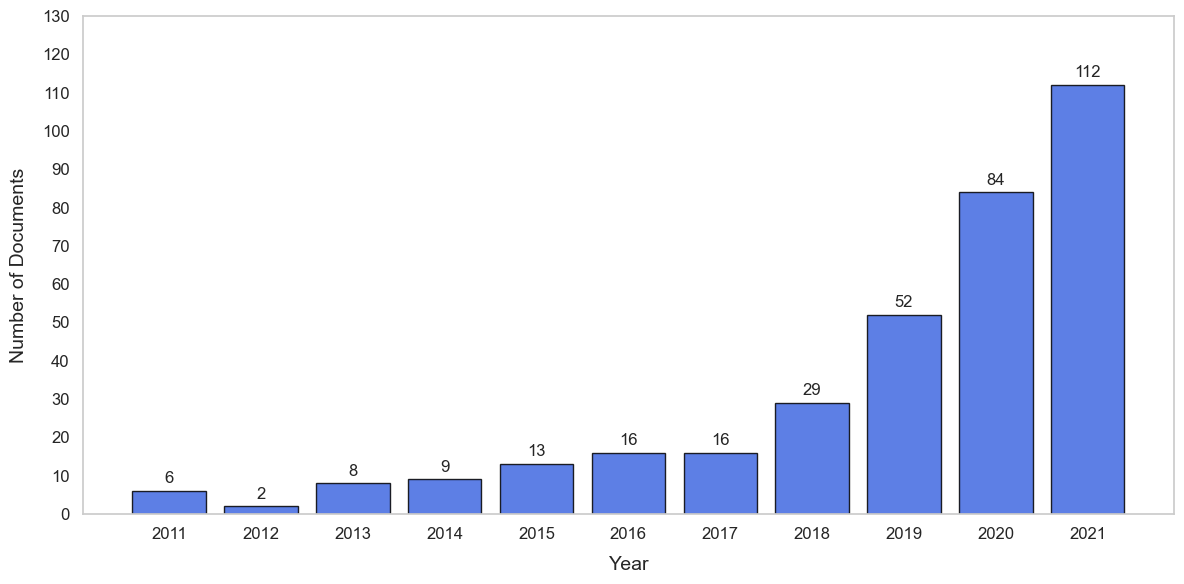

In [ ]:
# creating a list of years
years = list(range(2011,2022))
# numbers per year taken from the Literature
numbers = [6,2,8,9,13,16,16,29,52,84,112]


# Create a bar chart for yearly literature growth in AI & ML in Finance
plt.figure(figsize=(12, 6))
bars = plt.bar(years, numbers, color='royalblue', edgecolor='black', alpha=0.85)

# Annotate values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{int(yval)}', ha='center', fontsize=12)

# Labels and title
plt.xlabel('Year', fontsize=14, labelpad=10)
plt.ylabel('Number of Documents', fontsize=14, labelpad=10)
#plt.title('Literature Growth: AI & ML in Finance', fontsize=16, pad=20)

# Formatting x and y ticks
plt.xticks(years, rotation=0, fontsize=12)
plt.yticks(np.arange(0, max(numbers) + 20, 10), fontsize=12)

# Remove grid for a cleaner look
plt.grid(False)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


### Annual Publication Trend Figure

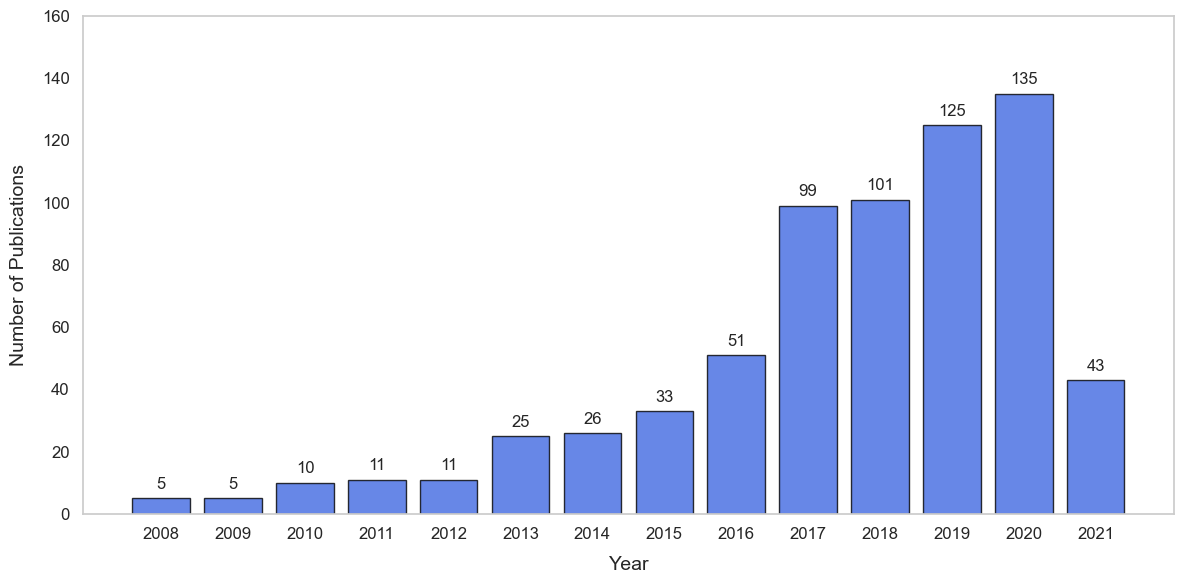

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
years = np.arange(2008, 2022)  
publications = [5, 5, 10, 11, 11, 25, 26, 33, 51, 99, 101, 125, 135, 43] 

# Creating a bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(years, publications, color='royalblue', edgecolor='black', alpha=0.8)

# Annotate values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 3, f'{int(yval)}', ha='center', fontsize=12)

# Labels and title
plt.xlabel('Year', fontsize=14, labelpad=10)
plt.ylabel('Number of Publications', fontsize=14, labelpad=10)
#plt.title('Annual Publications Trend', fontsize=16, pad=20)


# Formatting x and y ticks
plt.xticks(years, rotation=0, fontsize=12)
plt.yticks(np.arange(0, max(publications) + 30, 20), fontsize=12)
plt.grid(False)
# Adjust layout for spacing
plt.tight_layout()

# Display the plot
plt.show()
